In [1]:
import ROOT
import pylab as plt
import numpy as np
%matplotlib inline

Welcome to JupyROOT 6.09/01


In [2]:
f = ROOT.TFile("output.root")

In [3]:
tree = f.Get("tree")

In [4]:
tb0 = tree.GetBranch("Pad")
tb1 = tree.GetBranch("PSA")
tb2 = tree.GetBranch("Hit")

In [5]:
ROOT.gROOT.ProcessLine(
"struct tbjcPad\
{\
    int EventNum;\
    int PadNum;\
    float PadX;\
    float PadY;\
    int IsValid;\
    int RawAdc[512];\
    int MaxAdcIdx;\
    int IsPedestalSubtracted;\
    float Adc[512];\
    int IsAux;\
};" )
ROOT.gROOT.ProcessLine(
"struct tbjcPSA\
{\
    int EventNum;\
    float mesh[512];\
    float RhoVariance;\
    float QEventTot;\
};" )
ROOT.gROOT.ProcessLine(
"struct tbjcHit\
{\
    int EventNum;\
    int PadNum;\
    int hitNum;\
    float x;\
    float y;\
    float z;\
    float charge;\
};" )


0L

In [6]:
tbjcPadReg = ROOT.tbjcPad()
tbjcPSAReg = ROOT.tbjcPSA()
tbjcHitReg = ROOT.tbjcHit()

In [7]:
tb0.SetAddress(ROOT.AddressOf(tbjcPadReg,'EventNum'))
tb1.SetAddress(ROOT.AddressOf(tbjcPSAReg,'EventNum'))
tb2.SetAddress(ROOT.AddressOf(tbjcHitReg,'EventNum'))

In [8]:
num = tb0.GetEntries()
tb0.GetEntry(1)
print("######%i######" %(1))


######1######


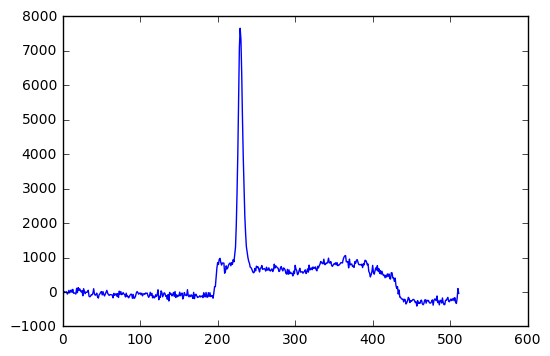

In [9]:
tb1.GetEntry(4)
mesh = []
for _ in range(512):
    mesh.append(tbjcPSAReg.mesh[_])
plt.plot(mesh)

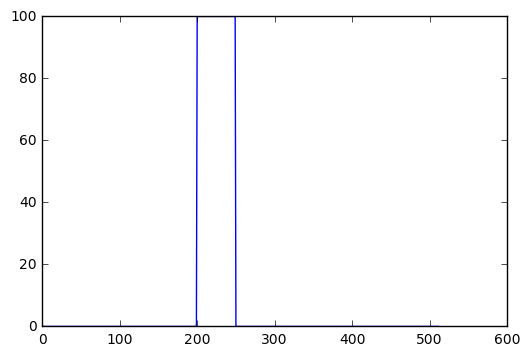

In [10]:
mesh1 = np.zeros(512)

for i in range(200,250):
    mesh1[i]=100
plt.plot(mesh1)

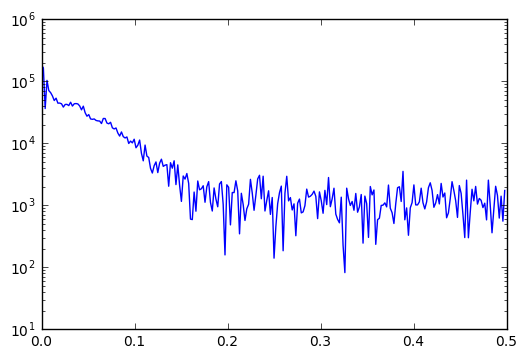

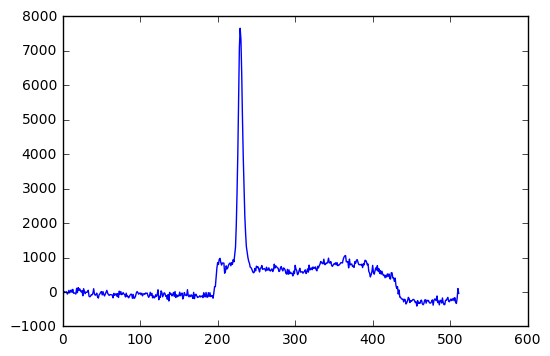

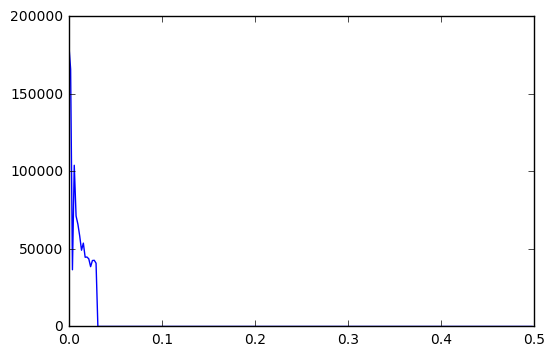

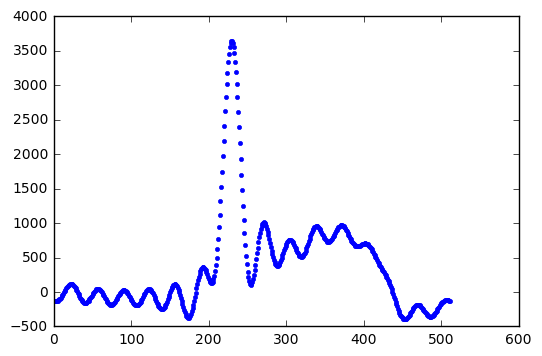

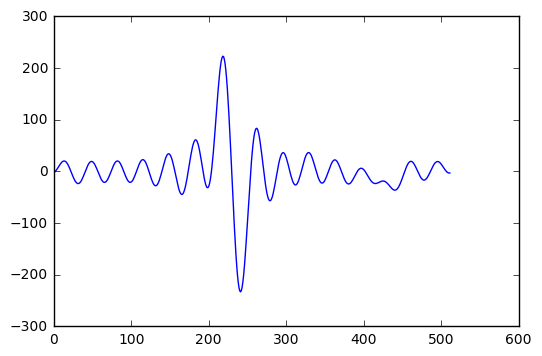

In [15]:
power = np.fft.fft(mesh)
freq = np.fft.fftfreq(len(mesh))
idx = np.argsort(freq)
plt.figure()
plt.plot(freq[idx],np.abs(power[idx]))
plt.xlim([0,0.5])
plt.gca().set_yscale('log')
plt.figure()
mesh_re = np.fft.ifft(power)
plt.plot(mesh_re.real)
power_new = np.zeros(power.shape[-1],dtype=complex)
for i in range(power.shape[-1]):
    p = power[i]
    f = freq[i]
    
    if abs(f)<0.03:
        power_new[i] = p
    else:
        power_new[i] = 0
plt.figure()
plt.plot(freq[idx],np.abs(power_new[idx]))
plt.xlim([0,0.5])
mesh_new = np.fft.ifft(power_new)
plt.figure()
plt.plot(mesh_new.real,'.')
mesh_grad = np.gradient(mesh_new.real)
plt.figure()
plt.plot(mesh_grad.real)